# Pre Processing



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset
df_train = pd.read_csv("RavdessAudioOnlyFeatures_TRAIN.csv")
df_test = pd.read_csv("RavdessAudioOnlyFeatures_TEST.csv")


In [ ]:
df_train['emotional_intensity'].value_counts()

normal    984
strong    844
Name: emotional_intensity, dtype: int64

In [ ]:
round(df_train['emotional_intensity'].value_counts()/df_train['emotional_intensity'].count() * 100, 2)

normal    53.83
strong    46.17
Name: emotional_intensity, dtype: float64

<AxesSubplot:ylabel='emotional_intensity'>

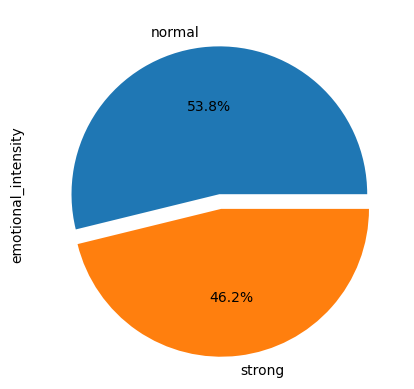

In [ ]:
df_train['emotional_intensity'].value_counts().plot(kind = 'pie',explode= (0,0.1),autopct='%1.1f%%')


In [ ]:
# Getting,

# Categorical Columns
categorical_cols = list(df_train.select_dtypes(include=['object']).columns)

# Numeric Columns
numeric_cols = list(df_train.select_dtypes(exclude=['object']).columns)

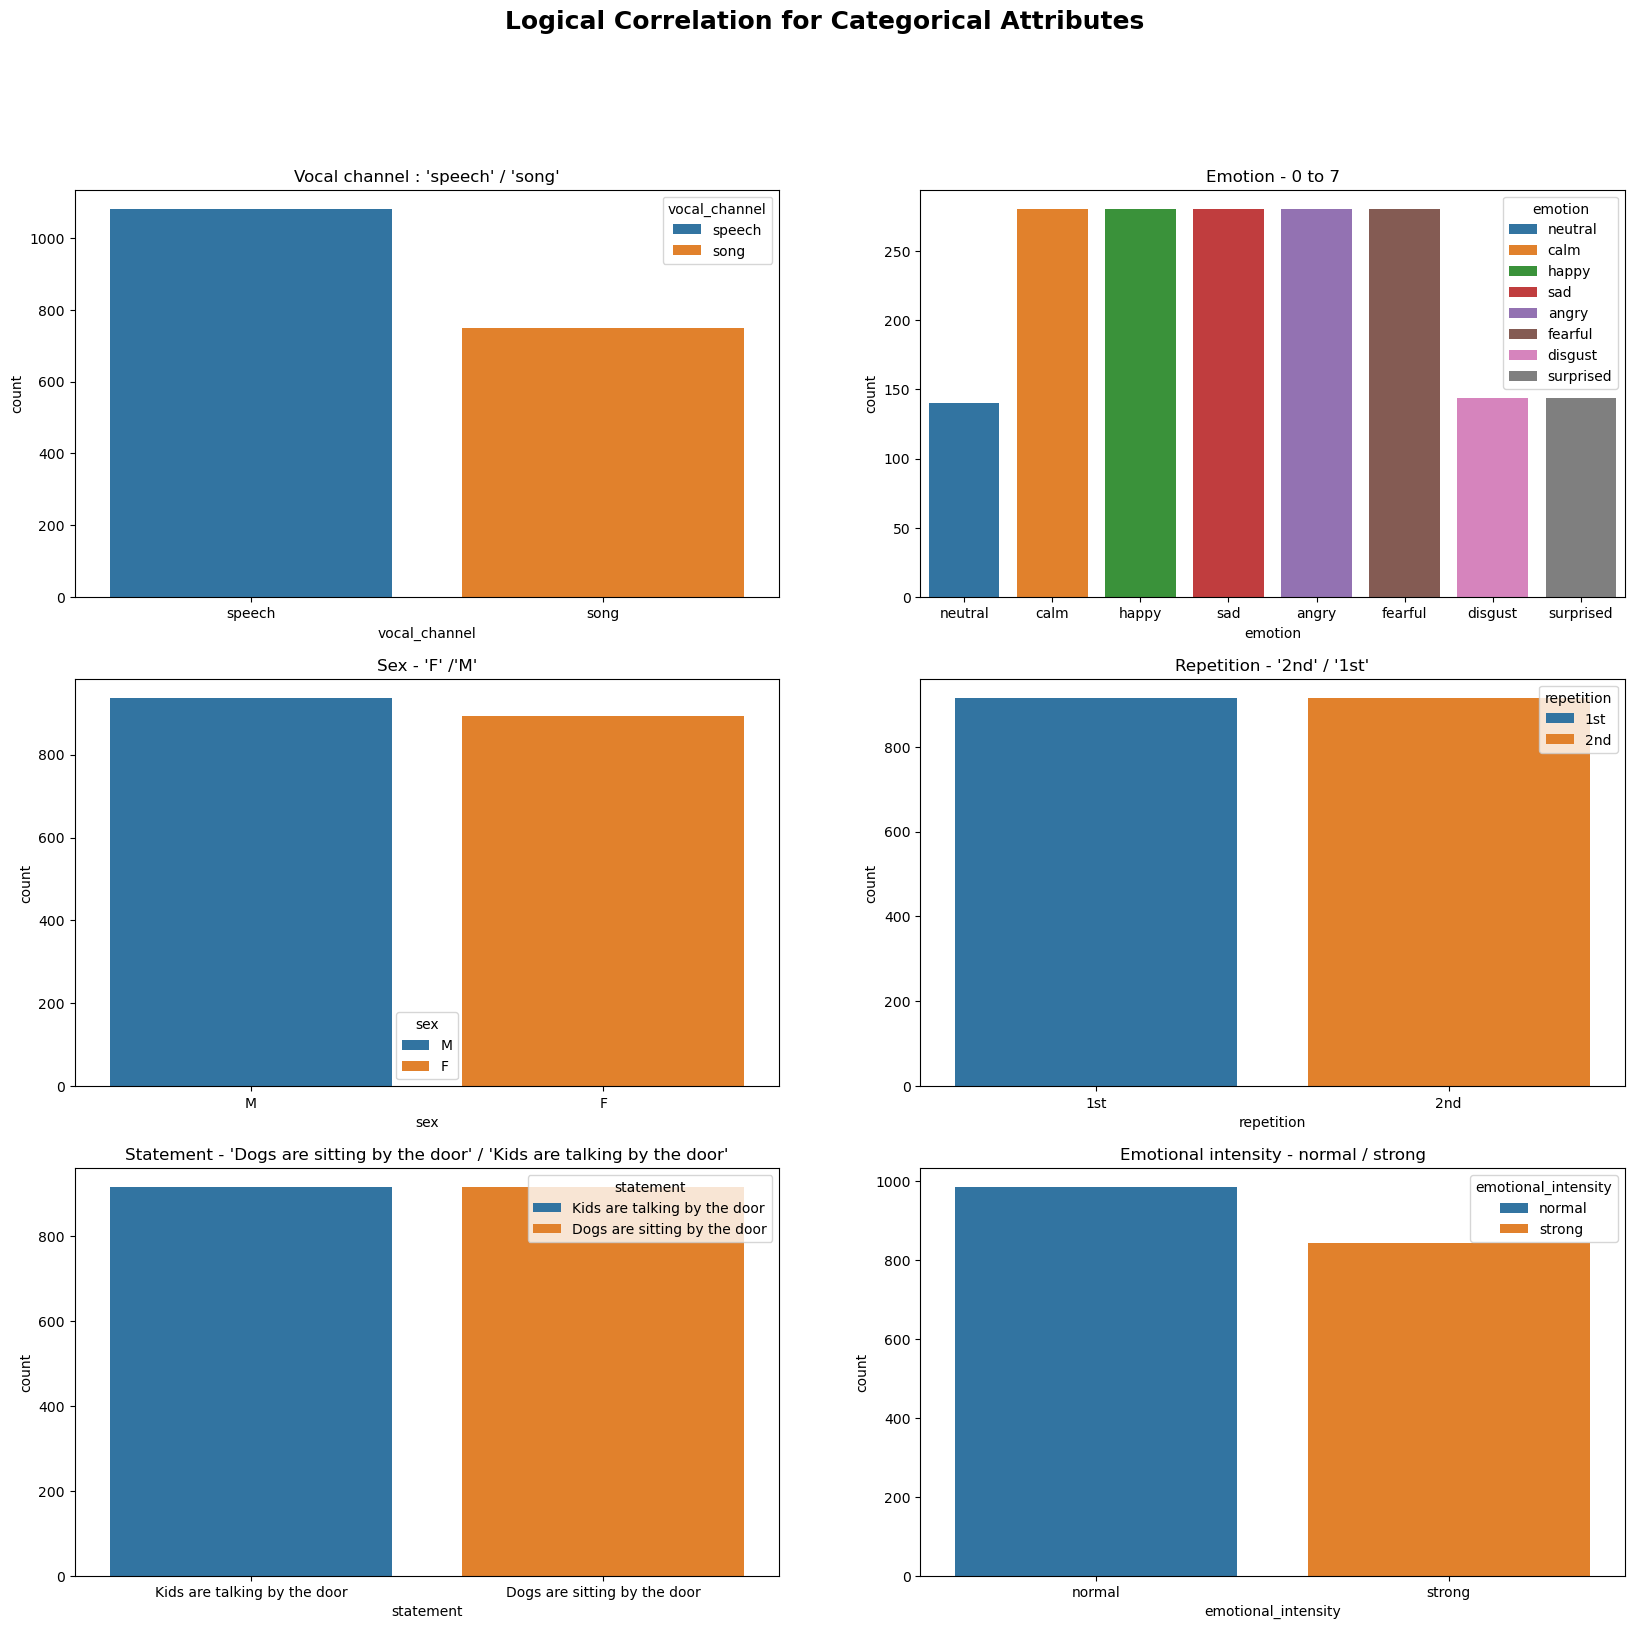

In [ ]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2, figsize = (20,18)) #checking the distribution

sns.countplot(data=df_train, x="vocal_channel", ax= ax1, hue = "vocal_channel", dodge=False)
ax1.set_title("Vocal channel : 'speech' / 'song'")

sns.countplot(data=df_train, x="emotion", ax= ax2, hue = "emotion", dodge=False)
# plt.xticks(rotation =90
ax2.set_title("Emotion - 0 to 7")

sns.countplot(data=df_train, x="sex", ax= ax3, hue = "sex", dodge=False)
ax3.set_title("Sex - 'F' /'M'")

sns.countplot(data=df_train, x="repetition", ax= ax4, hue = "repetition", dodge=False)
ax4.set_title("Repetition - '2nd' / '1st'")

sns.countplot(data=df_train, x="statement", ax= ax5, hue = "statement", dodge=False)
ax5.set_title("Statement - 'Dogs are sitting by the door' / 'Kids are talking by the door'")

sns.countplot(data=df_train, x="emotional_intensity", ax= ax6, hue = "emotional_intensity", dodge=False)
ax6.set_title("Emotional intensity - normal / strong")

plt.suptitle("Logical Correlation for Categorical Attributes",fontsize = 18, fontweight='bold')
plt.show()

In [ ]:
# Checking No. of Instances
df_train.index

RangeIndex(start=0, stop=1828, step=1)

In [ ]:
# Checking No. of Instances
len(df_train.columns)

434

In [ ]:
# Getting,
# Numeric Columns
numeric_cols = list(df_train.select_dtypes(exclude=['object']).columns)

In [ ]:
# Getting,

# Categorical Columns
categorical_cols = list(df_train.select_dtypes(include=['object']).columns)

In [ ]:
categorical_cols

['modality',
 'vocal_channel',
 'emotion',
 'emotional_intensity',
 'statement',
 'repetition',
 'sex',
 'filename']

In [ ]:
# len of num and cat cols
print("total cols: {}, num cols : {}, cat cols : {}".format(len(df_train.columns), len(numeric_cols), len(categorical_cols)))

total cols: 434, num cols : 426, cat cols : 8


In [ ]:
# droppinf file name cz it doesnt matter
df_train.drop(columns='filename',axis=1, inplace=True)

In [ ]:
categorical_cols.remove("filename")

In [ ]:
for x in categorical_cols:
    print("{}: {}".format(x, df_train[x].unique()))

modality: ['audio-only']
vocal_channel: ['speech' 'song']
emotion: ['neutral' 'calm' 'happy' 'sad' 'angry' 'fearful' 'disgust' 'surprised']
emotional_intensity: ['normal' 'strong']
statement: ['Kids are talking by the door' 'Dogs are sitting by the door']
repetition: ['1st' '2nd']
sex: ['M' 'F']


In [ ]:
df_train['modality'].value_counts()

audio-only    1828
Name: modality, dtype: int64

In [ ]:
# Converting Categorical Attributes to Numeric Values

statement_map = {"Dogs are sitting by the door": 0, "Kids are talking by the door": 1}

emotional_intensity_map = {"normal": 0, "strong": 1}

emotion_map = {'neutral':0, 'calm':1, 'happy':2, 'sad':3, 'angry':4, 'fearful':5, 'disgust':6, 'surprised':7}

repetition_map = {"1st": 0, "2nd": 1}

vocal_channel_map = {"speech": 0, "song": 1}

sex_map = {"M": 0, "F": 1}

df_train.replace({"sex": sex_map, "emotional_intensity": emotional_intensity_map, 
            "vocal_channel": vocal_channel_map, "repetition": repetition_map, 
           "statement": statement_map, "emotion": emotion_map}, inplace=True)

df_test.replace({"sex": sex_map, "emotional_intensity": emotional_intensity_map, 
            "vocal_channel": vocal_channel_map, "repetition": repetition_map, 
           "statement": statement_map, "emotion": emotion_map}, inplace=True)

In [ ]:
df_train.drop(columns='modality',axis=1, inplace=True)

In [ ]:
categorical_cols.remove("modality")

In [ ]:
# do a min max standardization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)
df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)

In [ ]:
df_train.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,frame_count,sum,mean,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.107840,0.385871,0.435971,...,0.0,0.000000,0.779808,0.850543,0.859081,0.907952,1.0,0.0,0.956060,0.048224
1,0.0,0.000000,0.0,1.0,1.0,0.0,0.0,0.117646,0.385792,0.435878,...,0.0,0.570998,0.650782,0.746581,0.800781,0.885585,1.0,0.0,0.107604,0.360443
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.098033,0.385883,0.435989,...,0.0,0.000000,0.575319,0.771084,0.832326,0.910557,1.0,0.0,0.379996,0.189619
3,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.068626,0.385857,0.435972,...,0.0,0.474429,0.550158,0.727086,0.811858,0.897600,1.0,0.0,0.119724,0.316584
4,0.0,0.142857,0.0,1.0,0.0,0.0,0.0,0.176466,0.385852,0.435923,...,0.0,0.385338,0.589475,0.760517,0.816912,0.888957,1.0,0.0,0.201877,0.273444


In [ ]:
df_train["vocal_channel"].value_counts()

0.0    1080
1.0     748
Name: vocal_channel, dtype: int64

In [ ]:
df_train["emotional_intensity"].value_counts()

0.0    984
1.0    844
Name: emotional_intensity, dtype: int64

In [ ]:
target_name = 'emotional_intensity'

attributes = [col for col in df_train.columns if col != target_name]

In [ ]:
X = df_train[attributes].values
y = df_train[target_name]

In [ ]:
X_train = df_train[attributes]
y_train = df_train[target_name]

In [ ]:
X_test = df_test[attributes]
y_test = df_test[target_name]

In [ ]:
df_train["emotional_intensity"].value_counts()

0.0    984
1.0    844
Name: emotional_intensity, dtype: int64

In [ ]:
df_test["emotional_intensity"].value_counts()

0    336
1    288
Name: emotional_intensity, dtype: int64

# Missing Value

In [ ]:
# Getting number of Missing Values
df_train.isnull().sum()

vocal_channel          0
emotion                0
emotional_intensity    0
statement              0
repetition             0
                      ..
stft_q75_w4            0
stft_q95_w4            0
stft_q99_w4            0
stft_kur_w4            0
stft_skew_w4           0
Length: 432, dtype: int64

In [ ]:
# Evaluating Missing Values in Percentage
def percentage_missing(df):
    percent_nan = round(100  * df.isnull().sum() / len(df), 2)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

percent_nan = percentage_missing(df_train)
percent_nan

Series([], dtype: float64)

In [ ]:
# Getting number of Missing Values
df_train.isnull().sum()

vocal_channel          0
emotion                0
emotional_intensity    0
statement              0
repetition             0
                      ..
stft_q75_w4            0
stft_q95_w4            0
stft_q99_w4            0
stft_kur_w4            0
stft_skew_w4           0
Length: 432, dtype: int64

In [ ]:
# Evaluating Missing Values in Percentage
def percentage_missing(df):
    percent_nan = round(100  * df.isnull().sum() / len(df), 2)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

percent_nan = percentage_missing(df_train)
percent_nan

Series([], dtype: float64)

# Initial Classification test with raw data

## 1)Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

param_grid = {'criterion': criterion,
             "max_depth" : max_depth
             }

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='accuracy',
                          cv=5)

grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]},
             scoring='accuracy')

In [ ]:
dec_tree = grid_model.best_estimator_
dec_tree

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [ ]:
y_pred = dec_tree.predict(X_test)

In [ ]:
len(X_test)

624

In [ ]:
# Print feature importance for non-zero values
for i in range(len(dec_tree.feature_importances_)):
    if dec_tree.feature_importances_[i] != 0:
        print(f"{X_train.columns[i]}: {dec_tree.feature_importances_[i]:.4f}")


emotion: 0.2009
max: 0.6799
sc_q50_w3: 0.1191


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.7035256410256411
F1-score [0.75753604 0.6185567 ]
              precision    recall  f1-score   support

           0      0.677     0.860     0.758       336
           1      0.761     0.521     0.619       288

    accuracy                          0.704       624
   macro avg      0.719     0.690     0.688       624
weighted avg      0.716     0.704     0.693       624



## 2)KNN

In [ ]:
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Creating a Pipeline to find K value
scaler = StandardScaler()
knn = KNeighborsClassifier()

operations = [('scaler',scaler),('knn',knn)]
pipe = Pipeline(operations)

k_values = list(range(1, int(math.sqrt(len(df_train)) + 1)))
param_grid = {'knn__n_neighbors': k_values}

full_cv_classifier = GridSearchCV(pipe,param_grid,cv=10,scoring='accuracy')
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]},
             scoring='accuracy')

In [ ]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.63182009, 0.66520447, 0.67285174, 0.67009848, 0.67831622,
       0.68488861, 0.68979763, 0.69473969, 0.70405933, 0.6903621 ,
       0.69474869, 0.69582658, 0.7095178 , 0.70239596, 0.70623311,
       0.69691947, 0.7095148 , 0.69691347, 0.70732901, 0.69421426,
       0.70569867, 0.6980454 , 0.70843392, 0.70076263, 0.70186453,
       0.69912929, 0.70514322, 0.69912328, 0.70843992, 0.6980454 ,
       0.70734702, 0.69858884, 0.70296943, 0.69912929, 0.69912929,
       0.69857683, 0.70076863, 0.69803038, 0.69748394, 0.6936558 ,
       0.69420525, 0.69420825])

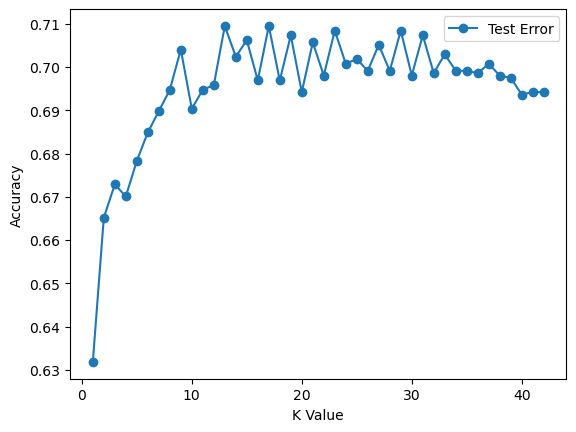

In [ ]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-', label='Test Error')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
print(full_cv_classifier.best_score_), print(full_cv_classifier.best_params_), print(full_cv_classifier.best_estimator_)

0.7095178045997719
{'knn__n_neighbors': 13}
Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=13))])


(None, None, None)

In [ ]:
y_pred = full_cv_classifier.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, classification_report
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))
# # Getting highly correlated atttributes count

Accuracy 0.46153846153846156
F1-score [0.         0.63157895]
              precision    recall  f1-score   support

           0      0.000     0.000     0.000       336
           1      0.462     1.000     0.632       288

    accuracy                          0.462       624
   macro avg      0.231     0.500     0.316       624
weighted avg      0.213     0.462     0.291       624



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
3+4


7

100 0
99 34
98 53
97 66
96 82
95 94
94 107
93 121
92 133
91 140
90 152
89 158
88 170
87 177
86 181
85 190
84 193
83 195
82 202
81 202
80 207
79 213
78 222
77 226
76 236
75 238
74 239
73 242
72 245
71 247
70 253
69 257
68 262
67 269
66 272
65 275
64 278
63 281
62 285
61 290
60 294
59 297
57 300
57 305
56 310
55 312
54 316
53 320
52 323
51 326
50 327
49 327
48 331
47 333
46 335
45 337
44 338
43 338
42 338
41 342
40 343
39 346
38 347
37 348
36 350
35 354
34 355
33 355
32 355
31 355
30 355
28 355
28 356
27 357
26 357
25 357
24 357
23 360
22 360
21 361
20 361
19 361
18 362
17 363
16 364
15 364
14 365
13 365
12 368
11 371
10 371
9 372
8 373
7 373
6 373
5 374
4 374
3 375
2 375
1 376


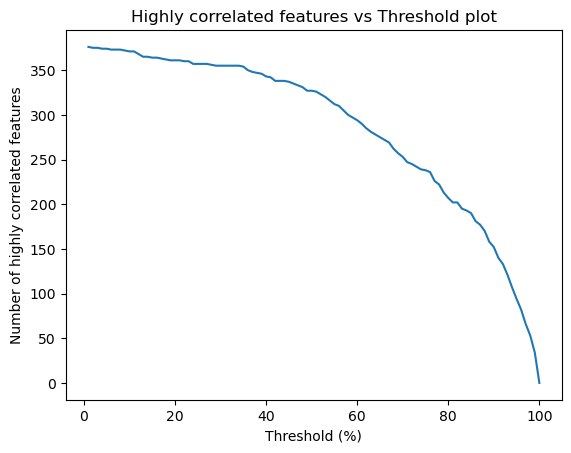

In [ ]:
# Compute the correlation matrix
corr_matrix = df_train.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find number of highly correlated features above different thresholds
no_corr_att = [] #no. of correlated attributes
for i in range(100, 0, -1):
    threshold = i * 0.01
    highly_correlated = [column for column in upper.columns if any(upper[column] > threshold)]
    no_corr_att.append(len(highly_correlated))
    print(int(threshold*100), len(highly_correlated))
    

# Plot the highly correlated features against different thresholds
plt.plot(np.arange(1, 101)[::-1], no_corr_att)
plt.xlabel('Threshold (%)')
plt.ylabel('Number of highly correlated features')
plt.title('Highly correlated features vs Threshold plot')
plt.show()

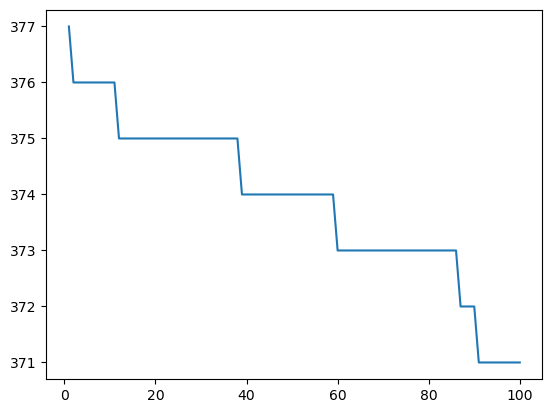

In [ ]:
# Getting Highly correlated attributes from 100% to 1%

# Compute the correlation matrix
corr_matrix = df_train.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.9
no_corr_att = [] #no. of correlated attributes

for i in range(100, 0, -1):
     highly_correlated = [column for column in upper.columns if any(upper[column] > (i * 0.001))]
     no_corr_att.append(len(highly_correlated))

plt.plot(range(100, 0, -1), no_corr_att)

(370.75, 371.5)

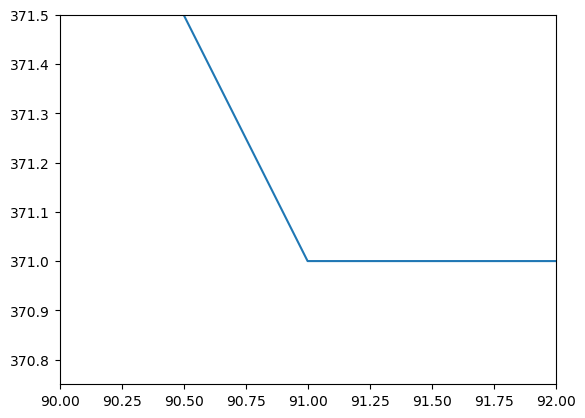

In [ ]:
plt.plot(range(100, 0, -1), no_corr_att)
plt.xlim(90, 92)
plt.ylim(370.75, 371.5)

# so, above 91% there are 371 highly correlated attributes to be removed

In [ ]:
highly_correlated = [column for column in upper.columns if any(upper[column] > (91 * 0.001))]
len(highly_correlated)
len(df_train.columns) - len(highly_correlated)

61

# Dimensionality reduction

## 1)Variance Threshold

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# obtain predicted probabilities for the positive class
y_proba = dec_tree.predict_proba(X_train)[:, 1]

# define the threshold values to try
thresholds = np.arange(0, 1.1, 0.1)[1:]

# define a dictionary of evaluation metrics to calculate
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# perform cross-validation for each threshold value and calculate the evaluation metrics
results = {}
for threshold in thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    cv_results = cross_validate(dec_tree, X_train, y_pred, cv=10, scoring=scoring)
    results[threshold] = {
        'accuracy': np.mean(cv_results['test_accuracy']),
        'precision': np.mean(cv_results['test_precision']),
        'recall': np.mean(cv_results['test_recall']),
        'f1': np.mean(cv_results['test_f1'])
    }

# remove threshold values where accuracy and F1 score are both equal to 1
results = {k: v for k, v in results.items() if v['accuracy'] < 1 or v['f1'] < 1}

# print the results for the top 3 best threshold values based on all evaluation metrics
print("Top 3 best threshold values based on all evaluation metrics:")
for i, (threshold, metrics) in enumerate(sorted(results.items(), key=lambda x: (x[1]['f1'], x[1]['accuracy'], x[1]['precision'], x[1]['recall']), reverse=True)[:3]):
    print(f"\n{i+1}. Threshold: {threshold:.2f}")
    for name, value in metrics.items():
        print(f"{name.capitalize()}: {value:.4f}")

Top 3 best threshold values based on all evaluation metrics:

1. Threshold: 0.10
Accuracy: 0.9989
Precision: 1.0000
Recall: 0.9988
F1: 0.9994

2. Threshold: 0.30
Accuracy: 0.9984
Precision: 0.9994
Recall: 0.9988
F1: 0.9991

3. Threshold: 0.20
Accuracy: 0.9984
Precision: 0.9994
Recall: 0.9988
F1: 0.9991


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWar

In [ ]:
X_train.shape

(1828, 431)

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import VarianceThreshold

# try different threshold values for feature selection
thresholds = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1]
results = []
for threshold in thresholds:
    # apply variance threshold feature selection to the training data
    sel = VarianceThreshold(threshold=threshold)
    X_train_sel = sel.fit_transform(X_train)

    # train a decision tree classifier on the selected feature set
    dec_tree = DecisionTreeClassifier(random_state=42)
    dec_tree.fit(X_train_sel, y_train)

    # obtain predicted probabilities for the positive class on the test set
    X_test_sel = sel.transform(X_test)
    y_proba = dec_tree.predict_proba(X_test_sel)[:, 1]

    # define the threshold value to use
    threshold_val = 0.5 # adjust threshold as needed

    # apply the threshold to obtain predicted labels and calculate evaluation metrics
    y_pred = (y_proba >= threshold_val).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    result = {
        'threshold': threshold,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'threshold_val': threshold_val,
        'n_features_retained': sum(sel.get_support()),
        'n_features_removed': len(sel.get_support()) - sum(sel.get_support())
    }
    results.append(result)

# sort the results list by F1 score in descending order, then accuracy in descending order
results = sorted(results, key=lambda x: (x['f1'], x['accuracy']), reverse=True)

# print the best result tuple and number of features retained and removed
best_result = results[0]
print(f"\nBest result tuple:")
print(f"Variance Threshold: {best_result['threshold']:.3f}")
print(f"Accuracy: {best_result['accuracy']:.4f}")
print(f"Precision: {best_result['precision']:.4f}")
print(f"Recall: {best_result['recall']:.4f}")
print(f"F1 score: {best_result['f1']:.4f}")
print(f"Number of features retained: {best_result['n_features_retained']}")
print(f"Number of features removed: {best_result['n_features_removed']}")


Best result tuple:
Variance Threshold: 0.050
Accuracy: 0.5256
Precision: 0.4919
Recall: 0.8472
F1 score: 0.6224
Number of features retained: 27
Number of features removed: 404


In [ ]:
# Var threshold = 0.1 has very good performance as determined above
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold = 0.05)
X_train_sel = sel.fit_transform(X_train)

X_train.shape, X_train_sel.shape

((1828, 431), (1828, 27))

In [ ]:
# KNN
X_test_sel = sel.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

X_test.shape, X_test_sel.shape

Accuracy 0.5384615384615384
F1-score [0.69620253 0.04      ]
              precision    recall  f1-score   support

           0       0.54      0.98      0.70       336
           1       0.50      0.02      0.04       288

    accuracy                           0.54       624
   macro avg       0.52      0.50      0.37       624
weighted avg       0.52      0.54      0.39       624



((624, 431), (624, 27))

In [ ]:
# Decision Tree
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

X_test.shape, X_test_sel.shape

Accuracy 0.5689102564102564
F1-score [0.51001821 0.61516452]
              precision    recall  f1-score   support

           0       0.66      0.42      0.51       336
           1       0.52      0.75      0.62       288

    accuracy                           0.57       624
   macro avg       0.59      0.58      0.56       624
weighted avg       0.60      0.57      0.56       624



((624, 431), (624, 27))

## 2)Univariate Feature Selection

### 2.1)KNN

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# perform univariate feature selection using the chi-squared test
selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X_train, y_train)

# print the selected feature indices
print("Selected feature indices:", selector.get_support(indices=True))

# train a k-NN classifier with the selected features
clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test)

# print the results
print("Selected features shape:", X_new.shape)
print("Selected features indices:", selector.get_support(indices=True))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Selected feature indices: [  9  11  18  32 181 264 266 273 278 300]
Selected features shape: (1828, 10)
Selected features indices: [  9  11  18  32 181 264 266 273 278 300]
Accuracy: 0.4599358974358974
F1-score: [0.         0.63007684]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       336
           1       0.46      1.00      0.63       288

    accuracy                           0.46       624
   macro avg       0.23      0.50      0.32       624
weighted avg       0.21      0.46      0.29       624



### 2.2)Decision Tree

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# perform univariate feature selection using the chi-squared test
selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X_train, y_train)

# print the selected feature indices
print("Selected feature indices:", selector.get_support(indices=True))

# train a Decison Tree classifier with the selected features
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test)

# print the results
print("Selected features shape:", X_new.shape)
print("Selected features indices:", selector.get_support(indices=True))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Selected feature indices: [  9  11  18  32 181 264 266 273 278 300]
Selected features shape: (1828, 10)
Selected features indices: [  9  11  18  32 181 264 266 273 278 300]
Accuracy: 0.7035256410256411
F1-score: [0.75753604 0.6185567 ]
              precision    recall  f1-score   support

           0       0.68      0.86      0.76       336
           1       0.76      0.52      0.62       288

    accuracy                           0.70       624
   macro avg       0.72      0.69      0.69       624
weighted avg       0.72      0.70      0.69       624



## 3)Recursive Feature Elimination

Best number of features: 25
Selected Features:
Index(['max', 'q01', 'lag1_q05', 'mfcc_std', 'mfcc_min', 'q99_w3',
       'lag1_std_w3', 'lag1_min_w3'],
      dtype='object')
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       336
           1       0.72      0.54      0.62       288

    accuracy                           0.69       624
   macro avg       0.70      0.68      0.68       624
weighted avg       0.70      0.69      0.68       624



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


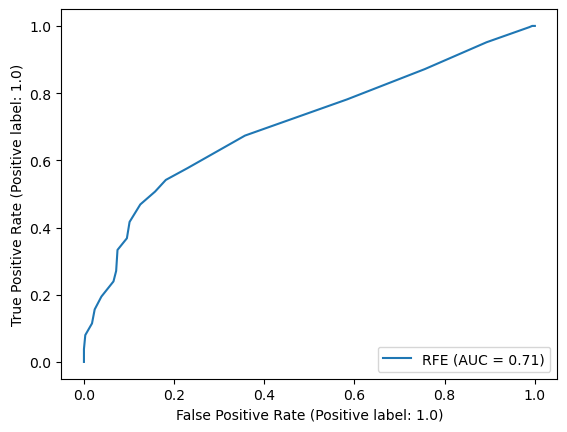

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, cross_val_score

# Train a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Select features with importance score above 0.01
feature_mask = rfc.feature_importances_ > 0.01

# Apply recursive feature elimination with the selected features
rfe = RFE(estimator=rfc, n_features_to_select=sum(feature_mask), step=1)
rfe.fit(X_train.loc[:, feature_mask], y_train)

# create a range of numbers of features to select
num_features = [25, 50, 75, 100, 125, 150]

# define the RFE estimator to use with the selected features
rfe_selected = RFE(estimator=rfc, n_features_to_select=sum(feature_mask), step=1)

# define the grid search parameters
param_grid = {'n_features_to_select': num_features}

# create the grid search object with cross-validation
grid = GridSearchCV(estimator=rfe_selected, param_grid=param_grid, cv=5)

# fit the grid search object to the data
grid.fit(X_train.loc[:, feature_mask], y_train)

# get the selected features from RFE
selected_features = X_train.loc[:, feature_mask].columns[rfe.support_]

# store the selected features in a list for further classification with other models
selected_features_list = selected_features.tolist()

# print the results
print('Best number of features:', grid.best_params_['n_features_to_select'])

# print the selected features
print("Selected Features:")
print(selected_features)

from sklearn.metrics import accuracy_score, classification_report, f1_score, plot_roc_curve, precision_score, recall_score

# predict using the best estimator from grid search
y_pred = grid.best_estimator_.predict(X_test.loc[:, feature_mask])

# # calculate and print evaluation metrics
# print("Accuracy: ", accuracy_score(y_test, y_pred))
# print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
# print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
# print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))

# print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# create and plot ROC curve
plot_roc_curve(grid.best_estimator_, X_test.loc[:, feature_mask], y_test)


### Classification Report: 0.005

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       336
           1       0.67      0.56      0.61       288

    accuracy                           0.67       624
   macro avg       0.67      0.66      0.66       624
weighted avg       0.67      0.67      0.67       624


 ### Classification Report: 0.009  

              precision    recall  f1-score   support 

           0       0.65      0.90      0.75       336
           1       0.78      0.44      0.56       288

    accuracy                           0.69       624
   macro avg       0.72      0.67      0.66       624
weighted avg       0.71      0.69      0.67       624

### Classification Report: 0.01

              precision    recall  f1-score   support

           0       0.68      0.82      0.74       336
           1       0.72      0.54      0.62       288

    accuracy                           0.69       624
   macro avg       0.70      0.68      0.68       624
weighted avg       0.70      0.69      0.68       624

### 3.1)Decision Tree

In [ ]:
# Training model on reduced selected features

# Decision Tree
# train a Decison Tree classifier with the selected features
from sklearn.tree import DecisionTreeClassifier

# create a new decision tree classifier with only the selected features
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train.loc[:, feature_mask].loc[:, selected_features], y_train)

# predict using the new decision tree classifier
y_pred = dtc.predict(X_test.loc[:, feature_mask].loc[:, selected_features])

# calculate and print evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted', zero_division=1))
print("Recall: ", recall_score(y_test, y_pred, average='weighted', zero_division=1))
print("F1 Score: ", f1_score(y_test, y_pred, average='weighted', zero_division=1))

# create and plot ROC curve
# plot_roc_curve(dtc, X_test.loc[:, feature_mask].loc[:, selected_features], y_test)

# print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy:  0.3685897435897436
Precision:  0.37307054999681344
Recall:  0.3685897435897436
F1 Score:  0.36825243792574797
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.34      0.36       336
           1       0.34      0.41      0.37       288

    accuracy                           0.37       624
   macro avg       0.37      0.37      0.37       624
weighted avg       0.37      0.37      0.37       624



### 3.2)KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# create a new KNN classifier with only the selected features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train.loc[:, feature_mask].loc[:, selected_features], y_train)

# predict using the new KNN classifier
y_pred = knn.predict(X_test.loc[:, feature_mask].loc[:, selected_features])

# calculate and print evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted', zero_division=1))
print("Recall: ", recall_score(y_test, y_pred, average='weighted', zero_division=1))
print("F1 Score: ", f1_score(y_test, y_pred, average='weighted', zero_division=1))

# print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy:  0.5384615384615384
Precision:  0.7514792899408284
Recall:  0.5384615384615384
F1 Score:  0.37692307692307697
Classification Report:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       336
           1       0.00      0.00      0.00       288

    accuracy                           0.54       624
   macro avg       0.27      0.50      0.35       624
weighted avg       0.29      0.54      0.38       624



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 4)PCA

### 4.1)Performing PCA on all features (all 434 features)

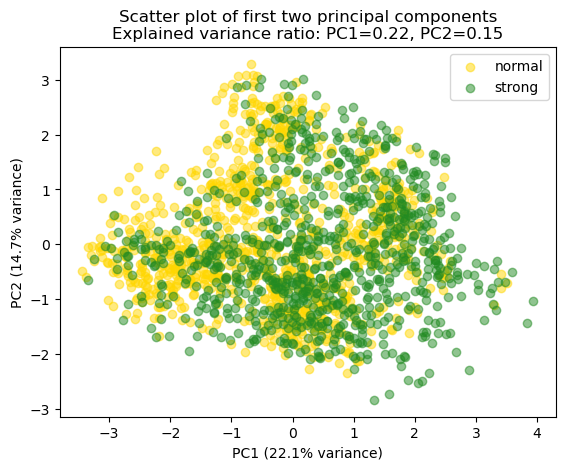

In [ ]:
# Performing PCA on all features (all 434 features)

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from collections import defaultdict
from sklearn.decomposition import PCA

y= y_train.values
# Define colors for each label
color_map = {0: "#FFD700", 1: "#228B22"}
# color_map = {0: "skyblue", 1: "coral"}

# Add a fallback color for any other labels
fallback_color = mcolors.CSS4_COLORS['saddlebrown']
color_map = defaultdict(lambda: fallback_color, color_map)

# Fit PCA to the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Get the explained variance ratio for each principal component
variance_ratio = pca.explained_variance_ratio_

# Create a list of point labels based on the true labels
label_names = {0: "normal", 1: "strong"}
point_labels = [label_names[label] for label in y]

# Plot the first two principal components with colors based on label
fig, ax = plt.subplots()
for label in np.unique(y):
    ix = np.where(y == label)
    ax.scatter(X_pca[ix, 0], X_pca[ix, 1], c=color_map[label], label=label_names[label], alpha=0.5)

# Add the explained variance ratio to the plot title
plt.title(f"Scatter plot of first two principal components\nExplained variance ratio: PC1={variance_ratio[0]:.2f}, PC2={variance_ratio[1]:.2f}")

# Add labels to the axes
plt.xlabel(f"PC1 ({variance_ratio[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({variance_ratio[1]*100:.1f}% variance)")

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()
# Loadings vs Features for PCA

### 4.1.1)Loadings vs Features for PCA

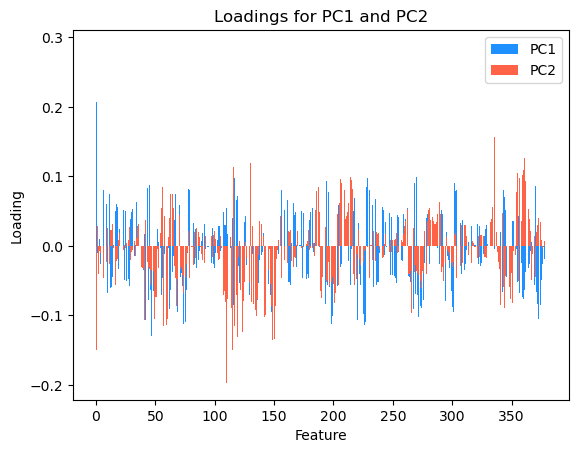

Number of selected features by each Principal Component: 380


In [ ]:
# Loadings vs Features for PCA

import numpy as np
import matplotlib.pyplot as plt

# Get the loadings for each feature on each principal component
loadings = pca.components_

# Get the number of components and features
n_components, n_features = loadings.shape

# Define the threshold for selecting important features
threshold = 0.0

# Get the feature names from the data
selected_features = X_train.columns.to_list()

# Loop over the principal components and find the important features
important_features = []
for component_loadings in loadings:
    important_indices = np.where(np.abs(component_loadings) > threshold)[0]
    important_features.append([selected_features[i] for i in important_indices])

# Get the loadings for the important features of PC1 and PC2
pc1_loadings = loadings[0, important_indices]
pc2_loadings = loadings[1, important_indices]

# Create a bar plot of the loadings for PC1 and PC2
fig, ax = plt.subplots()
ax.bar(np.arange(len(pc1_loadings)), pc1_loadings, color='dodgerblue', label='PC1')
ax.bar(np.arange(len(pc2_loadings)), pc2_loadings, color='tomato', label='PC2')

# Add labels and legend
ax.set_xlabel('Feature')
ax.set_ylabel('Loading')
ax.set_title('Loadings for PC1 and PC2')
ax.legend()
plt.show()

print(f"Number of selected features by each Principal Component: {len(important_features[0])}")

### 4.1.2) Testing Performance after PCA on whole Data set


#### Decision Tree

In [ ]:
len(selected_features)

431

In [ ]:
# # Running this code will take some time, so I have added op as comments for reference

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, f1_score, classification_report

# # Define the hyperparameters to search over
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [2, 4, 6, 8, 10],
#     'min_samples_split': [2, 4, 6, 8, 10],
#     'min_samples_leaf': [1, 2, 3, 4, 5]
# }

# # Create a decision tree classifier object
# clf = DecisionTreeClassifier()

# # Create a grid search object
# grid_search = GridSearchCV(clf, param_grid, cv=5)

# # Fit the grid search object to the data
# grid_search.fit(X_train[selected_features], y_train)

# # Use the best estimator to make predictions on the test set
# y_pred = grid_search.best_estimator_.predict(X_test[selected_features])

# # Print the evaluation metrics
# print('Accuracy %s' % accuracy_score(y_test, y_pred))
# print('F1-score %s' % f1_score(y_test, y_pred, average=None))
# print(classification_report(y_test, y_pred))

Accuracy 0.7035256410256411
F1-score [0.75753604 0.6185567 ]
              precision    recall  f1-score   support

           0       0.68      0.86      0.76       336
           1       0.76      0.52      0.62       288

    accuracy                           0.70       624
   macro avg       0.72      0.69      0.69       624
weighted avg       0.72      0.70      0.69       624



In [ ]:
# Accuracy 0.7035256410256411
# F1-score [0.75753604 0.6185567 ]
#               precision    recall  f1-score   support

#            0       0.68      0.86      0.76       336
#            1       0.76      0.52      0.62       288

#     accuracy                           0.70       624
#    macro avg       0.72      0.69      0.69       624
# weighted avg       0.72      0.70      0.69       624

#### KNN

In [ ]:
# # Running this code will take some time, so I have added op as comments for reference

# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, f1_score, classification_report

# # Define the hyperparameters to search over
# param_grid = {
#     'n_neighbors': [1, 3, 5, 7, 9],
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'p': [1, 2]
# }

# # Create a KNN classifier object
# clf = KNeighborsClassifier()

# # Create a grid search object
# grid_search = GridSearchCV(clf, param_grid, cv=5)

# # Fit the grid search object to the data
# grid_search.fit(X_train[selected_features], y_train)

# # Use the best estimator to make predictions on the test set
# y_pred = grid_search.best_estimator_.predict(X_test[selected_features])

# # Print the evaluation metrics
# print('Accuracy %s' % accuracy_score(y_test, y_pred))
# print('F1-score %s' % f1_score(y_test, y_pred, average=None))
# print(classification_report(y_test, y_pred))

Accuracy 0.5464743589743589
F1-score [0.62615588 0.42362525]
              precision    recall  f1-score   support

           0       0.56      0.71      0.63       336
           1       0.51      0.36      0.42       288

    accuracy                           0.55       624
   macro avg       0.54      0.53      0.52       624
weighted avg       0.54      0.55      0.53       624



In [ ]:
# Accuracy 0.5464743589743589
# F1-score [0.62615588 0.42362525]
#               precision    recall  f1-score   support

#            0       0.56      0.71      0.63       336
#            1       0.51      0.36      0.42       288

#     accuracy                           0.55       624
#    macro avg       0.54      0.53      0.52       624
# weighted avg       0.54      0.55      0.53       624


### 4.2)Performing PCA on reduced features after RFE (just 25 features)

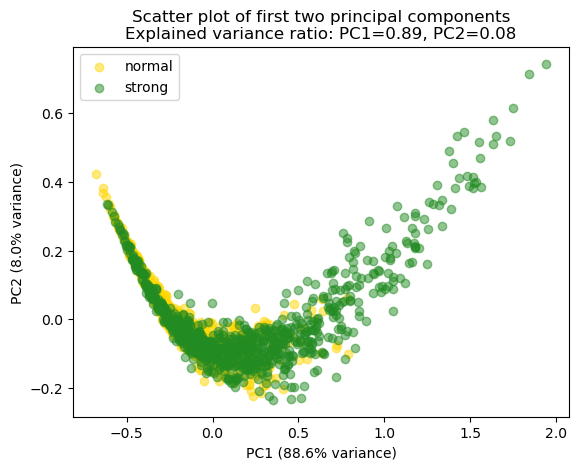

In [ ]:
# Performing PCA on reduced features after RFE (just 25 features)

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from collections import defaultdict
from sklearn.decomposition import PCA

y= y_train.values
# Define colors for each label
color_map = {0: "#FFD700", 1: "#228B22"}

# Add a fallback color for any other labels
fallback_color = mcolors.CSS4_COLORS['saddlebrown']
color_map = defaultdict(lambda: fallback_color, color_map)

# Fit PCA to the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train[selected_features_list])

# Get the explained variance ratio for each principal component
variance_ratio = pca.explained_variance_ratio_

# Create a list of point labels based on the true labels
label_names = {0: "normal", 1: "strong"}
point_labels = [label_names[label] for label in y]

# Plot the first two principal components with colors based on label
fig, ax = plt.subplots()
for label in np.unique(y):
    ix = np.where(y == label)
    ax.scatter(X_pca[ix, 0], X_pca[ix, 1], c=color_map[label], label=label_names[label], alpha=0.5)

# Add the explained variance ratio to the plot title
plt.title(f"Scatter plot of first two principal components\nExplained variance ratio: PC1={variance_ratio[0]:.2f}, PC2={variance_ratio[1]:.2f}")

# Add labels to the axes
plt.xlabel(f"PC1 ({variance_ratio[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({variance_ratio[1]*100:.1f}% variance)")

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


In PCA, loadings represent the correlation between each original feature and each principal component. The loadings are calculated as the product of the standardized feature values and the corresponding eigenvector (or principal component) score.

More specifically, if we have a dataset with m observations and n features, we can standardize the data by subtracting the mean and dividing by the standard deviation for each feature. Let X be the resulting standardized data matrix of shape (m, n). We can then perform PCA on X to obtain k principal components, where k is less than or equal to n.

The loadings for the ith feature and jth principal component are given by:

Copy
loading_ij = eigenvector_ij * sqrt(eigenvalue_j)
where eigenvector_ij is the ith element of the jth eigenvector (or principal component), and eigenvalue_j is the jth eigenvalue of the covariance matrix of X.

The plot of loadings vs features shows the loadings for each feature on each principal component. Each bar in the plot represents the loading for a single feature on a single principal component. The height of the bar represents the magnitude of the loading, and the color of the bar (if applicable) represents the sign of the loading (positive or negative).

By examining the plot of loadings vs features, we can gain insights into which features are most strongly associated with each principal component. Features with high loadings on a particular component are considered to be important for that component, and contribute more to the variance explained by that component. Conversely, features with low loadings on a particular component are considered to be less important for that component, and may not contribute much to the variance explained by that component.

By analyzing the plot of loadings vs features, we can also identify any patterns or relationships between the features and the principal components. For example, we may observe that certain groups of features have high loadings on the same principal component, indicating that they are correlated with each other and may be capturing the same underlying information. We may also observe that certain features have high loadings on multiple principal components, indicating that they are relevant to multiple aspects of the data.

Overall, the plot of loadings vs features is a useful tool for interpreting the results of PCA and gaining insights into the underlying structure of the data.

### 4.2.1)Loadings vs Features for PCA

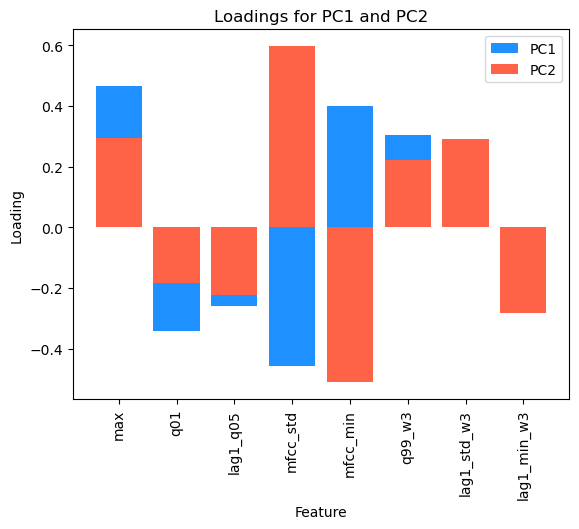

Number of selected features by each Principal Component: 8


In [ ]:
# Loadings vs Features for PCA

import numpy as np
import matplotlib.pyplot as plt

# Get the loadings for each feature on each principal component
loadings = pca.components_

# Get the number of components and features
n_components, n_features = loadings.shape

# Define the threshold for selecting important features
threshold = 0.0

# Get the feature names from the data
selected_features = selected_features_list.copy()

# Loop over the principal components and find the important features
important_features = []
for component_loadings in loadings:
    important_indices = np.where(np.abs(component_loadings) > threshold)[0]
    important_features.append([selected_features[i] for i in important_indices])

# Get the loadings for the important features of PC1 and PC2
pc1_loadings = loadings[0, important_indices]
pc2_loadings = loadings[1, important_indices]

# Create a bar plot of the loadings for PC1 and PC2
fig, ax = plt.subplots()
ax.bar(np.arange(len(pc1_loadings)), pc1_loadings, color='dodgerblue', label='PC1')
ax.bar(np.arange(len(pc2_loadings)), pc2_loadings, color='tomato', label='PC2')

# Set the x-axis labels to the important feature names
ax.set_xticks(np.arange(len(pc1_loadings)))
ax.set_xticklabels(important_features[0], rotation=90)

# Add labels and legend
ax.set_xlabel('Feature')
ax.set_ylabel('Loading')
ax.set_title('Loadings for PC1 and PC2')
ax.legend()
plt.show()

print(f"Number of selected features by each Principal Component: {len(important_features[0])}")

### 4.2.2) Testing Performance after PCA on whole Data set


#### Decision Tree

In [ ]:
len(selected_features)

8

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Define the hyperparameters to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Create a decision tree classifier object
clf = DecisionTreeClassifier()

# Create a grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train[selected_features], y_train)

# Use the best estimator to make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test[selected_features])

# Print the evaluation metrics
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7035256410256411
F1-score [0.75753604 0.6185567 ]
              precision    recall  f1-score   support

           0       0.68      0.86      0.76       336
           1       0.76      0.52      0.62       288

    accuracy                           0.70       624
   macro avg       0.72      0.69      0.69       624
weighted avg       0.72      0.70      0.69       624



#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Define the hyperparameters to search over
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create a KNN classifier object
clf = KNeighborsClassifier()

# Create a grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train[selected_features], y_train)

# Use the best estimator to make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test[selected_features])

# Print the evaluation metrics
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6025641025641025
F1-score [0.72626932 0.2748538 ]
              precision    recall  f1-score   support

           0       0.58      0.98      0.73       336
           1       0.87      0.16      0.27       288

    accuracy                           0.60       624
   macro avg       0.72      0.57      0.50       624
weighted avg       0.71      0.60      0.52       624



## 5)Random Subspace Projection

In [ ]:
from sklearn import random_projection
rsp = random_projection.GaussianRandomProjection(n_components=2, random_state=0)
X_train_rsp = rsp.fit_transform(X_train)
X_train_rsp.shape

(1828, 2)

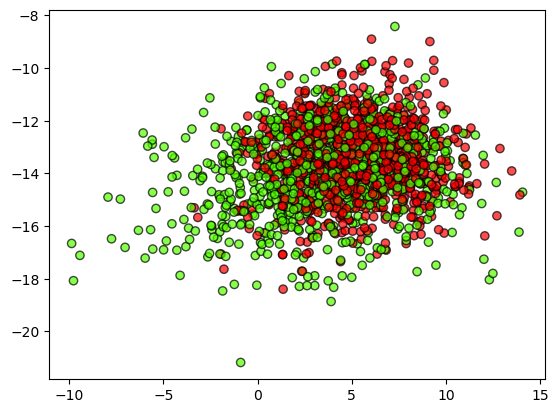

In [ ]:
plt.scatter(X_train_rsp[:, 0], X_train_rsp[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
# KNN
X_test_rsp = rsp.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train_rsp, y_train)

y_pred = clf.predict(X_test_rsp)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

X_test_rsp.shape

Accuracy 0.46153846153846156
F1-score [0.         0.63157895]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       336
           1       0.46      1.00      0.63       288

    accuracy                           0.46       624
   macro avg       0.23      0.50      0.32       624
weighted avg       0.21      0.46      0.29       624



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(624, 2)

In [ ]:
# Decision Tree
X_test_rsp = rsp.transform(X_test)

clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf.fit(X_train_rsp, y_train)

y_pred = clf.predict(X_test_rsp)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

X_test_rsp.shape

Accuracy 0.46153846153846156
F1-score [0.         0.63157895]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       336
           1       0.46      1.00      0.63       288

    accuracy                           0.46       624
   macro avg       0.23      0.50      0.32       624
weighted avg       0.21      0.46      0.29       624



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(624, 2)

## 6)Multi Dimensional Scaling


In [ ]:
from sklearn.manifold import MDS
mds = MDS(n_components=2) #, normalized_stress='auto') # shoudl run as sammon mapping
X_train_mds = mds.fit_transform(X_train)
X_train_mds.shape

(1828, 2)

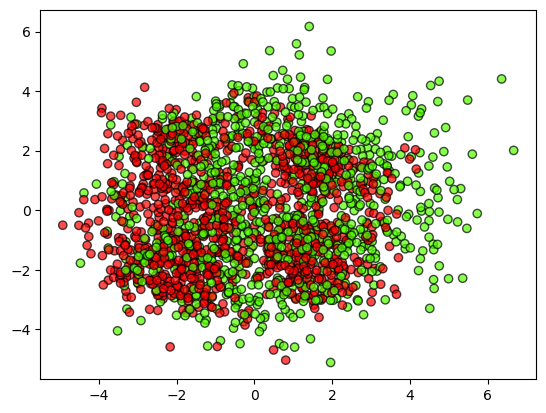

In [ ]:
plt.scatter(X_train_mds[:, 0], X_train_mds[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
# KNN
clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train_mds, y_train)

y_pred = clf.predict(X_train_mds)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))


Accuracy 0.6958424507658644
F1-score [0.73371648 0.64540816]
              precision    recall  f1-score   support

         0.0       0.69      0.78      0.73       984
         1.0       0.70      0.60      0.65       844

    accuracy                           0.70      1828
   macro avg       0.70      0.69      0.69      1828
weighted avg       0.70      0.70      0.69      1828



In [ ]:
# Decision Tree
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_mds, y_train)

y_pred = clf.predict(X_train_mds)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.8763676148796499
F1-score [0.88654618 0.86418269]
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       984
         1.0       0.88      0.85      0.86       844

    accuracy                           0.88      1828
   macro avg       0.88      0.87      0.88      1828
weighted avg       0.88      0.88      0.88      1828

